In [1]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

from analysis.bivariable import BiVariableAnalysis
from outputs.variables import OutputVars, PostProcessedOutputVars

from copy import copy, deepcopy

import pandas as pd

import seaborn as sns
import seaborn.objects as so

from ladybug.datacollection import HourlyContinuousCollection
from ladybug.header import Header
# Apply the default theme
sns.set_theme()

import numpy as np

In [2]:
bv = BiVariableAnalysis("test0")
# bv.update_qois(OutputVars.site_wind_speed, OutputVars.zone_ach)
# bv.run()


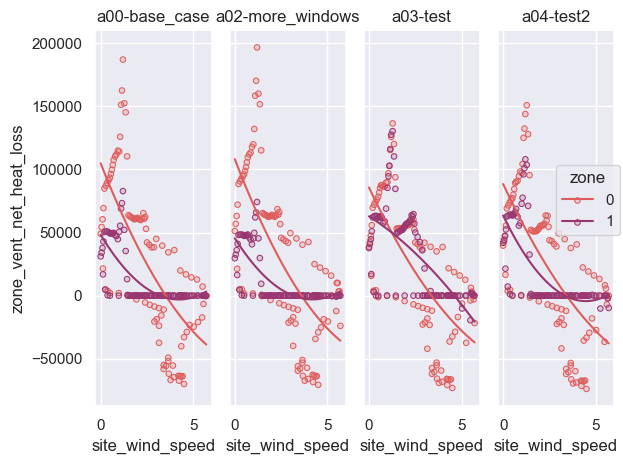

In [3]:
bv.update_qois(OutputVars.site_wind_speed, PostProcessedOutputVars.zone_vent_net_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=True)
bv.run()

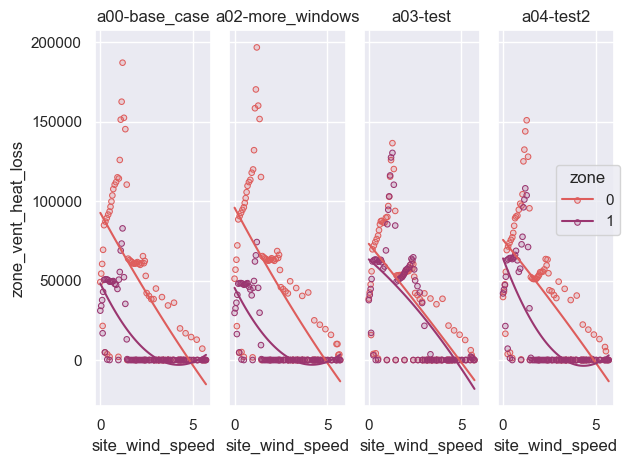

In [4]:
bv.update_qois(OutputVars.site_wind_speed, OutputVars.zone_vent_heat_loss)
bv.update_is_post_process_qoi(qoi2_bool=False)
bv.run()

In [ ]:
# bv.update_qois(OutputVars.site_db_temp , OutputVars.zone_mean_air_temp)
# bv.run()

In [ ]:
# bv.update_qois(OutputVars.site_direct_solar_rad , OutputVars.zone_mean_air_temp)
# bv.run()

In [ ]:
# bv.update_qois(OutputVars.site_diffuse_solar_rad , OutputVars.zone_mean_air_temp)
# bv.run()

In [ ]:
sql = bv.case_sqls["a00-base_case"]
heat_loss = bv.get_var_data(sql, OutputVars.zone_vent_heat_loss)
heat_gain = bv.get_var_data(sql, OutputVars.zone_vent_heat_gain)
heat_loss[0].header.metadata["System"]

'BLOCK 00 STOREY 0'

In [ ]:
new_header = deepcopy(heat_loss[0].header)
new_header.metadata["type"] = "AFN Zone Ventilation Sensible Net Heat Loss Rate"

net_heat_loss = []
for ix, (loss, gain) in enumerate(zip(heat_loss, heat_gain)):
    np_val = np.array(heat_loss[ix].values) - np.array(heat_gain[ix].values)
    new_vals = tuple(np_val.tolist())
    net_heat_loss.append(HourlyContinuousCollection(new_header, new_vals))

# here assuming just one analysis period.. 


In [ ]:
net_heat_loss

[15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Power (W)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Power (W)
 ...96 values...]

In [ ]:
net_heat_loss[0].header

Power (W)
7/1 to 7/1 between 0 and 23 @4
type: AFN Zone Ventilation Sensible Net Heat Loss Rate
System: BLOCK 00 STOREY 0